### In the notebook, we load the user data and their weekly purchase information into a pandas dataframe and analyze the buying dynamics of each cohort.

In [1]:
from openpyxl import load_workbook
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the excel workbook, load the sheets into dataframes

wb = load_workbook('ChallengeData.xlsx')
print(wb.get_sheet_names)

user_data = wb['user_data']
week_total_purchases = wb['week_total_purchases']

user_data = pd.DataFrame(user_data.values)
week_total_purchases = pd.DataFrame(week_total_purchases.values)

<bound method Workbook.get_sheet_names of <openpyxl.workbook.workbook.Workbook object at 0x122b00b38>>


In [3]:
# Set the 0th row as the column names and then drop that row

user_data.columns = user_data.iloc[0]
week_total_purchases.columns = week_total_purchases.iloc[0]

user_data = user_data.drop(0)
week_total_purchases = week_total_purchases.drop(0)

In [4]:
cols = ['week 1',
        'week 2',
        'week 3',
        'week 4',
        'week 5',
        'week 6',
        'week 7',
        'week 8',
        'week 9',
        'week 10',
        'week 11',
        'week 12',
        'week 13',
        'week 14',
        'week 15']

In [5]:
week_total_purchases = week_total_purchases[['userid']+cols]

In [6]:
user_data.head(5)

,userid,cohort,has_first_name,has_last_name,has_verfied_email,has_phone,number_of_items_watched
1,1101,c,False,True,False,False,0
2,1105,a,True,True,False,True,1
3,1109,c,True,True,True,False,10
4,1118,a,True,False,False,False,0
5,1135,c,True,True,True,False,5


In [7]:
week_total_purchases.head(5)

,userid,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,week 11,week 12,week 13,week 14,week 15
1,1101,0,0,4,1,1,0,0,2,0,0,0,1,0,0,1
2,1105,6,5,3,4,4,2,0,0,1,0,3,3,0,0,1
3,1109,0,0,4,3,4,0,1,1,0,0,1,0,0,0,0
4,1118,0,2,3,5,0,0,0,2,1,0,3,3,0,0,0
5,1135,0,0,4,3,0,3,0,1,0,2,0,1,0,1,2


In [8]:
total = user_data.merge(week_total_purchases, left_on='userid', right_on='userid')

In [9]:
total.groupby('cohort')[cols].agg(np.sum)

,week 1,week 2,week 3,week 4,week 5,week 6,week 7,week 8,week 9,week 10,week 11,week 12,week 13,week 14,week 15
cohort,,,,,,,,,,,,,,,
a,799,666,670,934,521,463,318,629,408,366,323,597,407,359,301
b,241,288,381,838,427,419,555,964,530,568,489,929,457,390,485
c,641,600,584,801,517,387,328,472,288,273,233,456,253,267,215


On the chart below we clearly see that cohort B has peaked compared to the other cohorts 9 out of 15 times. 
Also, the dynamics for each of the cohorts from week 1 towards week 15 are different: cohort A and C have declined with time, and cohort B has generally grown. This information indicates that cohort B is currently showing the best results in selling antibodies.


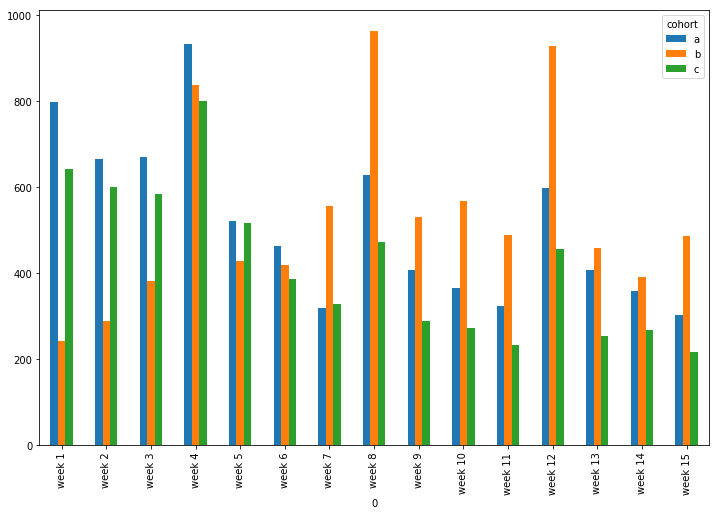

In [10]:
total.groupby('cohort')[cols].agg(np.sum).T.plot.bar(figsize=(12,8))

Below we see how many items were watched by each cohort.

In [11]:
total.groupby('cohort')['number_of_items_watched'].agg(np.sum)

cohort
a    2302
b    1217
c    2077
Name: number_of_items_watched, dtype: int64

Below we see how many users have filled out their names, phones, and verified emails.
The most successful cohort B has the highest rate of verifying emails, because it is the necessary condition for actually making purchases, and at the same time, this cohort has the lowest numbers of filled out names and phones.

In [12]:
total.groupby('cohort')[['has_first_name', 'has_last_name', 
                         'has_verfied_email', 'has_phone']].sum()

,has_first_name,has_last_name,has_verfied_email,has_phone
cohort,,,,
a,241,332,191,123
b,181,241,266,85
c,271,374,123,109
